In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

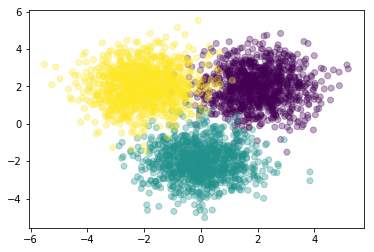

In [2]:
D = 2 # Number of predictors
K = 3 #Number of targets
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.3333)

In [3]:
X.shape

(3000, 2)

In [4]:
y.shape

(3000,)

In [5]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def shuffle(*args):
    idx = np.random.permutation(len(args[0]))
    return [X[idx] for X in args]

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def feed_forward(X,W1,b1,W2,b2):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    P_hat = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P_hat
    
def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [6]:
Y = one_hot_encode(y)
Y.shape

(3000, 3)

In [7]:
M = 6 #Number of nuerons in a layer

W1_0 = np.random.randn(D,M)
b1_0 = np.random.randn(M)
W2_0 = np.random.randn(M,K)
b2_0 = np.random.randn(K)

In [8]:
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

eta = 1e-4
epochs = int(1e2)
J = np.zeros(epochs)

for epoch in range(epochs):
    Z1, P_hat = feed_forward(X,W1,b1,W2,b2)
    J[epoch] = cross_entropy(Y,P_hat)
    
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T,dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis = 0)

In [9]:
#RMS Prop with Nesterov momentum




W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

GW1 = 1
Gb1 = 1
GW2 = 1
Gb2 = 1

#v is velocity in Nesterov
vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0

gamma = .999
epsilon = 1e-8

eta = 1e-4
mu = 0.9

J_RMS = np.zeros(epochs)

for epoch in range(1,epochs):
    #Second layer
    Z1, P_hat = feed_forward(X,W1,b1,W2,b2)
    J_RMS[epoch] = 1/N*cross_entropy(Y,P_hat)
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T,dH2)
    db2 = dH2.sum(axis=0)
    GW2 = gamma * GW2 + (1-gamma) * dW2**2
    Gb2 = gamma * Gb2 + (1-gamma) * db2**2
    vW2 = mu*vW2 - eta/np.sqrt(GW2 + epsilon)*dW2
    vb2 = mu*vb2 - eta/np.sqrt(Gb2 + epsilon)*db2

    W2 += mu * vW2 - eta / (np.sqrt(GW2 + epsilon)) * dW2
    b2 += mu * vb2 - eta / (np.sqrt(Gb2 + epsilon)) * db2

    
    #First Layer
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    db1 = dH1.sum(axis = 0)


    GW1 = gamma * GW1 + (1-gamma) * dW1**2
    Gb1 = gamma * Gb1 + (1-gamma) * db1**2
    vW1 = mu*vW1 - eta/np.sqrt(GW1 + epsilon)*dW1
    vb1 = mu*vb1 - eta/np.sqrt(Gb1 + epsilon)*db1



    W1 += mu * vW1 - eta / (np.sqrt(GW1 + epsilon)) * dW1
    b1 += mu * vb1 - eta / (np.sqrt(Gb1 + epsilon)) * db1

In [10]:
J_RMS

array([0.        , 3.89966857, 3.78627374, 3.66022167, 3.52285729,
       3.378346  , 3.23003465, 3.08054168, 2.93211397, 2.78620474,
       2.64408885, 2.50668605, 2.3745459 , 2.24803638, 2.12743975,
       2.01284695, 1.9043521 , 1.80198896, 1.70572826, 1.61548675,
       1.53112654, 1.45249443, 1.37922905, 1.31109314, 1.24775027,
       1.18884353, 1.1341241 , 1.08325511, 1.03590243, 0.99177074,
       0.95059489, 0.91212432, 0.87619883, 0.84255434, 0.81101445,
       0.78155224, 0.75395124, 0.7280459 , 0.70372843, 0.68091884,
       0.65954242, 0.63951053, 0.6207521 , 0.60314843, 0.58661819,
       0.57112033, 0.55655584, 0.54289304, 0.53007939, 0.51802808,
       0.50669079, 0.49599899, 0.48591296, 0.47639853, 0.46740163,
       0.45888651, 0.45080936, 0.44314381, 0.43586976, 0.42894395,
       0.42233841, 0.41603575, 0.4100142 , 0.40425607, 0.39873823,
       0.39344343, 0.38836311, 0.38348218, 0.37878396, 0.37426058,
       0.36989947, 0.3656857 , 0.36161383, 0.35767228, 0.35385

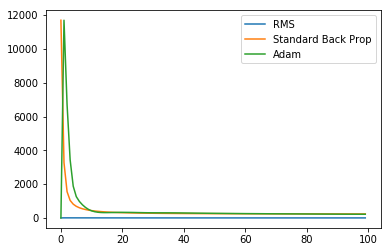

In [11]:
# Adam 

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_m_a = np.zeros(epochs)


gamma = .999
epsilon = 1e-8

eta = 1e-1
mu = 0.9

#v is variance in Adam

vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0
m1_v = 0
m2_v = 0
v1_v = 0
v2_v = 0

m1_b = 0
m2_b = 0
v1_b = 0
v2_b = 0



for epoch in range(1,epochs):
    #Second layer
    Z1, P_hat = feed_forward(X,W1,b1,W2,b2)
    J_m_a[epoch] = cross_entropy(Y,P_hat)
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T,dH2)
    db2 = dH2.sum(axis = 0)
    
    #Variance
    m2_v = mu * m2_v + (1 - mu) * dW2
    v2_v = gamma * v2_v + (1 - gamma) * dW2**2
    m_hat2_v = m2_v / (1 - mu**epoch)
    v_hat2_v = v2_v / (1 - gamma**epoch)
    #For bias
    m2_b = mu * m2_b + (1 - mu) * db2
    v2_b = gamma * v2_b + (1 - gamma) * db2**2
    m_hat2_b = m2_b / (1 - mu**epoch)
    v_hat2_b = v2_b /(1 - gamma**epoch)
    
    W2 -= eta / np.sqrt(v_hat2_v + epsilon) * m_hat2_v
    b2 -= eta / np.sqrt(v_hat2_b + epsilon) * m_hat2_b
    
    
    #First layer
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    db1 = dH1.sum(axis = 0)
    #For variance
    m1_v = mu * m1_v + (1 - mu) * dW1
    v1_v = gamma * v1_v + (1 - gamma) * dW1**2
    m_hat1_v = m1_v / (1 - mu**epoch)
    v_hat1_v = v1_v /(1 - gamma**epoch)
    
    #For bias
    m1_b = mu * m1_b + (1 - mu) * db1
    v1_b = gamma * v1_b + (1 - gamma) * db1**2
    m_hat1_b = m1_b / (1 - mu**epoch)
    v_hat1_b = v1_b /(1 - gamma**epoch)
    
    W1 -= eta / np.sqrt(v_hat1_v + epsilon) * m_hat1_v
    b1 -= eta / np.sqrt(v_hat1_b + epsilon) * m_hat1_b
    
        
plt.figure()
plt.plot(J_RMS,label = "RMS")
plt.plot(J, label = "Standard Back Prop")
plt.plot(J_m_a, label = "Adam")
plt.legend()